<a href="https://colab.research.google.com/github/imakapp/IITM-Statistics2-Extra-Activity-3/blob/main/Extra_Activity_3_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

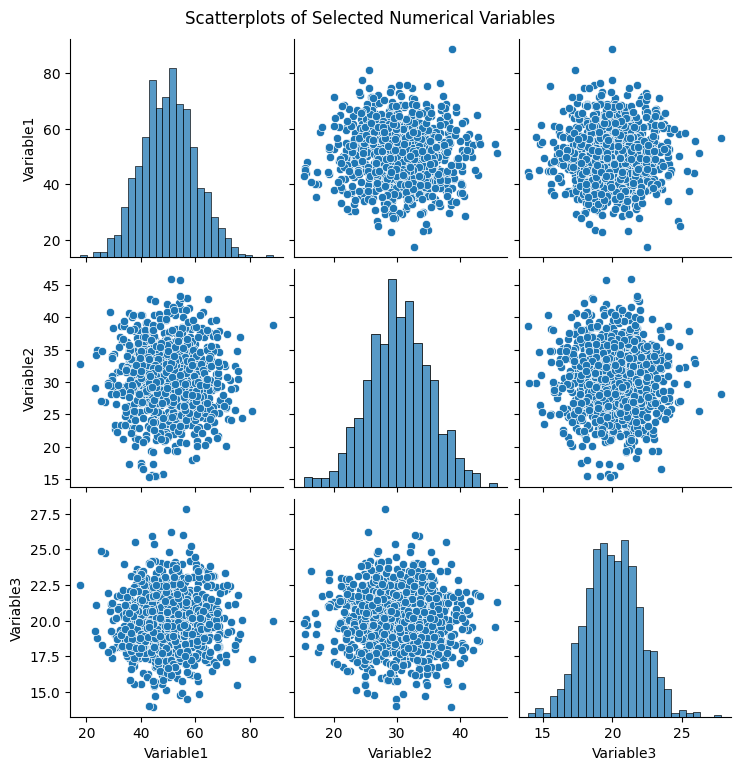

Covariance Matrix:
           Variable1  Variable2  Variable3
Variable1  95.886385  -1.972975   0.426208
Variable2  -1.972975  24.872881  -0.109860
Variable3   0.426208  -0.109860   3.868729

Mean Values:
Variable1    50.193321
Variable2    30.354181
Variable3    20.011668
dtype: float64

Standard Deviation Values:
Variable1    9.792159
Variable2    4.987272
Variable3    1.966909
dtype: float64

Chebyshev's Inequality Bounds (k=2):
{'Variable1': (30.609001794629744, 69.77763932181676), 'Variable2': (20.379637413971572, 40.328724958519985), 'Variable3': (16.07785130470375, 23.945485553520342)}


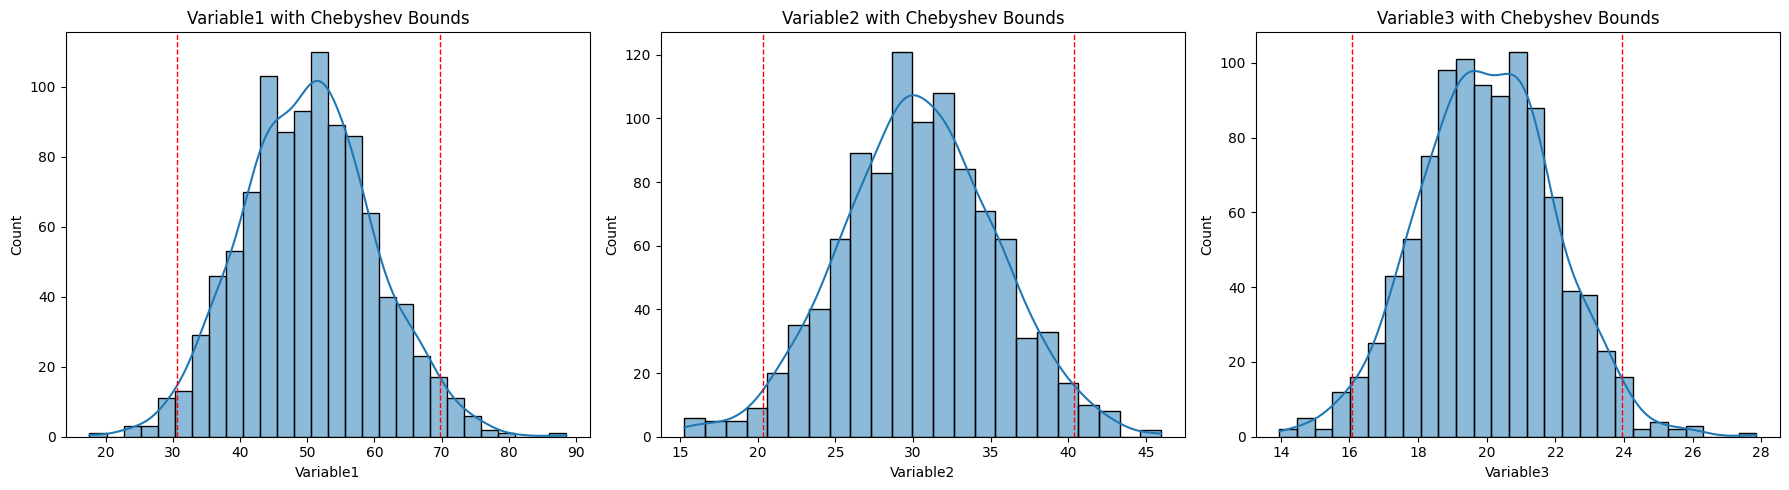

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'Variable1': np.random.normal(50, 10, 1000),
    'Variable2': np.random.normal(30, 5, 1000),
    'Variable3': np.random.normal(20, 2, 1000)
})

# Scatterplots: Show relationships between selected numerical variables
sns.pairplot(data)
plt.suptitle("Scatterplots of Selected Numerical Variables", y=1.02)
plt.show()

# Covariances: Indicate the strength and direction of the linear relationships
cov_matrix = data.cov()
print("Covariance Matrix:")
print(cov_matrix)

# Mean and Standard Deviation: Provide insights into the central tendency and variability
mean_values = data.mean()
std_dev_values = data.std()
print("\nMean Values:")
print(mean_values)
print("\nStandard Deviation Values:")
print(std_dev_values)

# Chebyshev's Inequality: Offers bounds within which a significant portion of the data lies
# For each variable, we calculate the range [mean - k*std_dev, mean + k*std_dev]
k = 2
chebyshev_bounds = {
    column: (mean_values[column] - k * std_dev_values[column], mean_values[column] + k * std_dev_values[column])
    for column in data.columns
}
print("\nChebyshev's Inequality Bounds (k=2):")
print(chebyshev_bounds)

# Visualize the bounds on the histogram
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].axvline(chebyshev_bounds[column][0], color='red', linestyle='dashed', linewidth=1)
    axes[i].axvline(chebyshev_bounds[column][1], color='red', linestyle='dashed', linewidth=1)
    axes[i].set_title(f'{column} with Chebyshev Bounds')
plt.tight_layout()
plt.show()
